In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv("glassdoor_reviews.csv")
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [14]:
df.shape

(838566, 18)

In [15]:
# Check for null values
print(df.isnull().sum())

# Remove rows with any null values
df = df.dropna()


firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
dtype: int64


In [16]:
df.shape

(108627, 18)

In [17]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()


4117


In [18]:
df['location'] = df['location'].str.lower()

df['location'].value_counts()

london, england, england    12675
bangalore                    5698
new york, ny                 4385
hyderābād                    2563
mumbai                       1960
                            ...  
jf kennedy ap, ny               1
manchestr ctr, vt               1
bremen, bremen, bremen          1
needville, tx                   1
wijnegem, antwerp               1
Name: location, Length: 6228, dtype: int64

In [19]:
df['job_title'].value_counts().head(50)

 Manager                            2582
 Anonymous Employee                 2523
 Consultant                         2247
 Software Engineer                  1945
 Associate                          1925
 Senior Consultant                  1836
 Analyst                            1717
 Senior Associate                   1316
 Crew Member                        1177
 Assistant Manager                  1110
 Customer Assistant                  967
 Director                            886
 Sales Assistant                     880
 Cashier                             846
 Project Manager                     843
 Senior Manager                      830
 Vice President                      825
 Business Analyst                    799
 Senior Software Engineer            789
 Customer Service Representative     748
 Sales Associate                     688
 Mcdonalds Crew Member               629
 Audit Associate                     593
 Student                             571
 Software Develo

In [20]:
df['firm'].value_counts().head(100)

Deloitte                     7035
McDonald-s                   6778
IBM                          5468
EY                           4621
PwC                          4265
                             ... 
University-College-London     182
Imperial-College-London       178
The-British-Army              171
Adecco                        170
Virgin-Media                  169
Name: firm, Length: 100, dtype: int64

In [21]:
industry_dict = {
    'Deloitte': 'Consulting',
    'McDonald-s': 'Hospitality',
    'IBM': 'Technology',
    'EY': 'Consulting',
    'PwC': 'Consulting',
    'KPMG': 'Consulting',
    'J-P-Morgan': 'Finance',
    'Oracle': 'Technology',
    'Microsoft': 'Technology',
    'Apple': 'Technology',
    'Google': 'Technology',
    'Tesco': 'Retail',
    'Citi': 'Finance',
    'HSBC-Holdings': 'Finance',
    'SAP': 'Technology',
    'Salesforce': 'Technology',
    'Marriott-International': 'Hospitality',
    'Barclays': 'Finance',
    'Goldman-Sachs': 'Finance',
    'Vodafone': 'Telecommunications',
    'American-Express': 'Finance',
    'NHS': 'Healthcare',
    'Morgan-Stanley': 'Finance',
    'BT': 'Telecommunications',
    'CBRE': 'Real Estate',
    'Pizza-Hut': 'Hospitality',
    'BNY-Mellon': 'Finance',
    'Unilever': 'Consumer Goods',
    'GlaxoSmithKline': 'Healthcare',
    'Marks-and-Spencer': 'Retail',
    'Booking-com': 'Travel',
    'Deutsche-Bank': 'Finance',
    'Capita': 'Consulting',
    'Hilton': 'Hospitality',
    'Primark': 'Retail',
    'Thomson-Reuters': 'Media',
    'ASDA': 'Retail',
    'J-Sainsbury': 'Retail',
    'McKinsey-and-Company': 'Consulting',
    'Sainsbury-s': 'Retail',
    'BNP-Paribas': 'Finance',
    'DHL-Supply-Chain': 'Logistics',
    'Sodexo': 'Hospitality',
    'Waitrose': 'Retail',
    'Boston-Consulting-Group': 'Consulting',
    'Lloyds-Banking-Group': 'Finance',
    'Morrisons': 'Retail',
    'Willis-Towers-Watson': 'Consulting',
    'B-and-M-Retail': 'Retail',
    'LinkedIn': 'Technology'
}


job_level_dict = {
    'manager': 'Middle',
    'anonymous-employee': 'Entry',
    'consultant': 'Middle',
    'software-engineer': 'Entry',
    'associate': 'Entry',
    'senior-consultant': 'Middle',
    'analyst': 'Entry',
    'senior-associate': 'Middle',
    'crew-member': 'Entry',
    'assistant-manager': 'Middle',
    'customer-assistant': 'Entry',
    'director': 'Senior',
    'sales-assistant': 'Entry',
    'cashier': 'Entry',
    'project-manager': 'Middle',
    'senior-manager': 'Senior',
    'vice-president': 'Senior',
    'business-analyst': 'Middle',
    'senior-software-engineer': 'Middle',
    'customer-service-representative': 'Entry',
    'sales-associate': 'Entry',
    'mcdonalds-crew-member': 'Entry',
    'audit-associate': 'Entry',
    'student': 'Entry',
    'software-developer': 'Entry',
    'senior-analyst': 'Middle',
    'customer-service': 'Entry',
    'account-executive': 'Middle',
    'team-leader': 'Middle',
    'account-manager': 'Middle',
    'associate-consultant': 'Entry',
    'administrative-assistant': 'Entry',
    'retail-assistant': 'Entry',
    'financial-analyst': 'Middle',
    'data-analyst': 'Entry',
    'delivery-driver': 'Entry',
    'sales': 'Entry',
    'product-manager': 'Middle',
    'applications-developer': 'Entry',
    'specialist': 'Middle',
    'sales-manager': 'Middle',
    'audit-senior': 'Middle',
    'auditor': 'Middle',
    'data-scientist': 'Middle',
    'sales-advisor': 'Entry',
    'avp': 'Senior',
    'executive-assistant': 'Middle',
    'accountant': 'Entry',
    'associate-director': 'Senior',
    'audit-senior-associate': 'Middle'
}

job_industry_dict = {
    'manager': 'general_management',
    'anonymous-employee': 'general',
    'consultant': 'consulting',
    'software-engineer': 'technology',
    'associate': 'general',
    'senior-consultant': 'consulting',
    'analyst': 'finance',
    'senior-associate': 'general',
    'crew-member': 'hospitality',
    'assistant-manager': 'general_management',
    'customer-assistant': 'customer_service',
    'director': 'general_management',
    'sales-assistant': 'sales',
    'cashier': 'retail',
    'project-manager': 'project_management',
    'senior-manager': 'general_management',
    'vice-president': 'executive',
    'business-analyst': 'business_analysis',
    'senior-software-engineer': 'technology',
    'customer-service-representative': 'customer_service',
    'sales-associate': 'sales',
    'mcdonalds-crew-member': 'hospitality',
    'audit-associate': 'finance',
    'student': 'education',
    'software-developer': 'technology',
    'senior-analyst': 'finance',
    'customer-service': 'customer_service',
    'account-executive': 'sales',
    'team-leader': 'general_management',
    'account-manager': 'sales',
    'associate-consultant': 'consulting',
    'administrative-assistant': 'administration',
    'retail-assistant': 'retail',
    'financial-analyst': 'finance',
    'data-analyst': 'technology',
    'delivery-driver': 'logistics',
    'sales': 'sales',
    'product-manager': 'product_management',
    'applications-developer': 'technology',
    'specialist': 'general',
    'sales-manager': 'sales',
    'audit-senior': 'finance',
    'auditor': 'finance',
    'data-scientist': 'technology',
    'sales-advisor': 'sales',
    'avp': 'finance',
    'executive-assistant': 'administration',
    'accountant': 'finance',
    'associate-director': 'general_management',
    'audit-senior-associate': 'finance'
}

In [22]:
# 统计公司和职位的出现频次
top_companies = df['firm'].value_counts().head(100).index
top_jobs = df['job_title'].value_counts().head(50).index

# 筛选数据
df_top_companies = df[df['firm'].isin(top_companies)]
df_top_jobs = df[df['job_title'].isin(top_jobs)]

df_top_jobs['job_title'] = df_top_jobs['job_title'].str.replace(' ', '-').str.strip().str.lower().str.lstrip('-')

df_top_companies.loc[:, 'firm_industry'] = df_top_companies['firm'].map(industry_dict)
df_top_jobs.loc[:, 'job_level'] = df_top_jobs['job_title'].map(job_level_dict)
df_top_jobs.loc[:, 'job_category'] = df_top_jobs['job_title'].map(job_industry_dict)


/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/3782428655.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_jobs['job_title'] = df_top_jobs['job_title'].str.replace(' ', '-').str.strip().str.lower().str.lstrip('-')
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/3782428655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_companies.loc[:, 'firm_industry'] = df_top_companies['firm'].map(industry_dict)
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipyke

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# 文本清理函数
def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

# 应用文本清理
df_top_companies['Cleaned_Headline'] = df_top_companies['headline'].apply(clean_text)
df_top_companies['Cleaned_Pros'] = df_top_companies['pros'].apply(clean_text)
df_top_companies['Cleaned_Cons'] = df_top_companies['cons'].apply(clean_text)

df_top_jobs['Cleaned_Headline'] = df_top_jobs['headline'].apply(clean_text)
df_top_jobs['Cleaned_Pros'] = df_top_jobs['pros'].apply(clean_text)
df_top_jobs['Cleaned_Cons'] = df_top_jobs['cons'].apply(clean_text)

# 分词和去除停用词
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df_top_companies['Processed_Headline'] = df_top_companies['Cleaned_Headline'].apply(preprocess_text)
df_top_companies['Processed_Pros'] = df_top_companies['Cleaned_Pros'].apply(preprocess_text)
df_top_companies['Processed_Cons'] = df_top_companies['Cleaned_Cons'].apply(preprocess_text)

df_top_jobs['Processed_Headline'] = df_top_jobs['Cleaned_Headline'].apply(preprocess_text)
df_top_jobs['Processed_Pros'] = df_top_jobs['Cleaned_Pros'].apply(preprocess_text)
df_top_jobs['Processed_Cons'] = df_top_jobs['Cleaned_Cons'].apply(preprocess_text)


/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/4109100665.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_companies['Cleaned_Headline'] = df_top_companies['headline'].apply(clean_text)
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/4109100665.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_companies['Cleaned_Pros'] = df_top_companies['pros'].apply(clean_text)
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/4109100665.py:17: Setting

In [24]:
analyzer = SentimentIntensityAnalyzer()

# 情感分析函数
def sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# 计算情感得分
df_top_companies['Sentiment_Headline'] = df_top_companies['Processed_Headline'].apply(sentiment_score)
df_top_companies['Sentiment_Pros'] = df_top_companies['Processed_Pros'].apply(sentiment_score)
df_top_companies['Sentiment_Cons'] = df_top_companies['Processed_Cons'].apply(sentiment_score)

df_top_jobs['Sentiment_Headline'] = df_top_jobs['Processed_Headline'].apply(sentiment_score)
df_top_jobs['Sentiment_Pros'] = df_top_jobs['Processed_Pros'].apply(sentiment_score)
df_top_jobs['Sentiment_Cons'] = df_top_jobs['Processed_Cons'].apply(sentiment_score)


def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


df_top_companies['Pros_Sentiment_Category'] = df_top_companies['Sentiment_Pros'].apply(classify_sentiment)
df_top_companies['Cons_Sentiment_Category'] = df_top_companies['Sentiment_Cons'].apply(classify_sentiment)
df_top_companies['Overall_Sentiment_Category'] = df_top_companies['Sentiment_Headline'].apply(classify_sentiment)


df_top_jobs['Pros_Sentiment_Category'] = df_top_jobs['Sentiment_Pros'].apply(classify_sentiment)
df_top_jobs['Cons_Sentiment_Category'] = df_top_jobs['Sentiment_Cons'].apply(classify_sentiment)
df_top_jobs['Overall_Sentiment_Category'] = df_top_jobs['Sentiment_Headline'].apply(classify_sentiment)

/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/4047763423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_companies['Sentiment_Headline'] = df_top_companies['Processed_Headline'].apply(sentiment_score)
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/4047763423.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_companies['Sentiment_Pros'] = df_top_companies['Processed_Pros'].apply(sentiment_score)
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykerne

In [56]:
df_top_companies.shape
# df_top_companies.columns

(90368, 31)

In [57]:
df_top_jobs.shape
# df_top_jobs.columns

(37863, 32)

In [60]:
df_top_companies.to_csv("Top_companies_cleaned.csv")

In [61]:
df_top_jobs.to_csv("Top_jobs_cleaned.csv")

In [25]:
# 按公司分组，计算平均评分和情感得分
company_group = df_top_companies.groupby('firm').mean()

# 可视化每个公司的各方面评分
# company_group[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']].plot(kind='bar', figsize=(14, 7))
# plt.title('Average Ratings by Company')
# plt.xlabel('Company')
# plt.ylabel('Average Rating')
# plt.legend(loc='best')
# plt.show()

# 输出每个公司的优缺点总结
# for company in company_group.index:
#     company_data = df_top_companies[df_top_companies['firm'] == company]
#     avg_pros_sentiment = company_data['Sentiment_Pros'].mean()
#     avg_cons_sentiment = company_data['Sentiment_Cons'].mean()
#     print(f"Company: {company}")
#     print(f"Average Pros Sentiment: {avg_pros_sentiment}")
#     print(f"Average Cons Sentiment: {avg_cons_sentiment}")
#     print("Top Pros:", company_data['pros'].value_counts().head(5).index.tolist())
#     print("Top Cons:", company_data['cons'].value_counts().head(5).index.tolist())
#     print("\n")


/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/60458367.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  company_group = df_top_companies.groupby('firm').mean()


In [26]:
# 按职位分组，计算平均评分和情感得分
job_group = df_top_jobs.groupby('job_title').mean()

# 可视化每个职位的各方面评分
# job_group[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']].plot(kind='bar', figsize=(14, 7))
# plt.title('Average Ratings by Job Title')
# plt.xlabel('Job Title')
# plt.ylabel('Average Rating')
# plt.legend(loc='best')
# plt.show()

# 输出每个职位的优缺点总结
# for job in job_group.index:
#     job_data = df_top_jobs[df_top_jobs['job_title'] == job]
#     avg_pros_sentiment = job_data['Sentiment_Pros'].mean()
#     avg_cons_sentiment = job_data['Sentiment_Cons'].mean()
#     print(f"Job Title: {job}")
#     print(f"Average Pros Sentiment: {avg_pros_sentiment}")
#     print(f"Average Cons Sentiment: {avg_cons_sentiment}")
#     print("Top Pros:", job_data['pros'].value_counts().head(5).index.tolist())
#     print("Top Cons:", job_data['cons'].value_counts().head(5).index.tolist())
#     print("\n")


/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/2727661921.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_group = df_top_jobs.groupby('job_title').mean()


/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/3886428627.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  company_group = df_top_companies.groupby('firm').mean()
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/3886428627.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_group = df_top_jobs.groupby('job_title').mean()


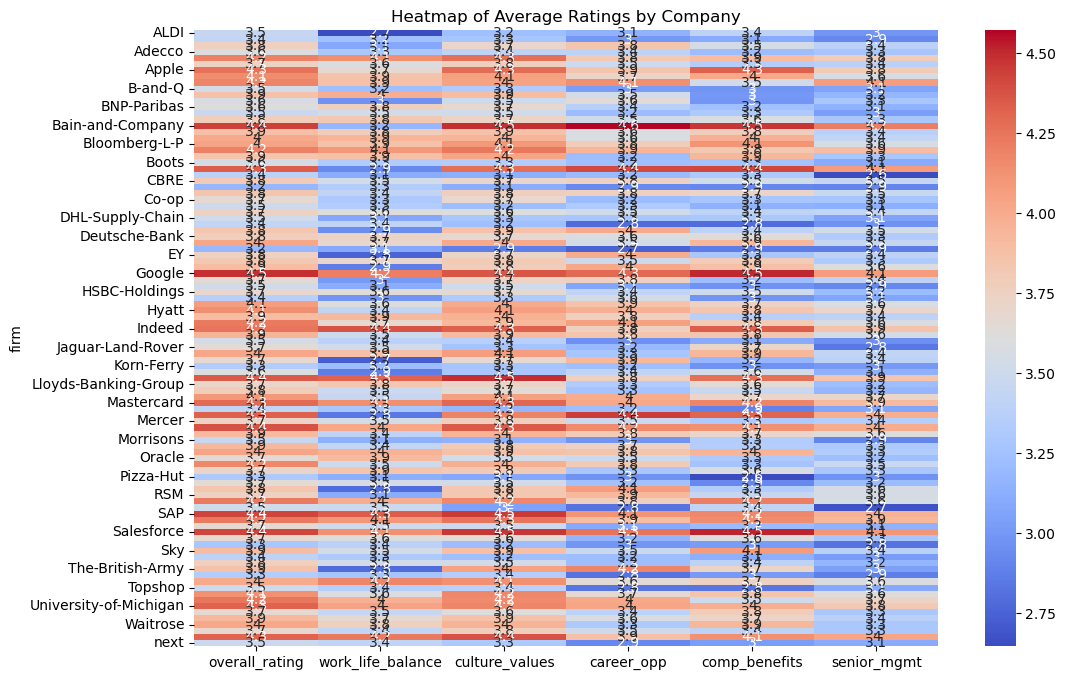

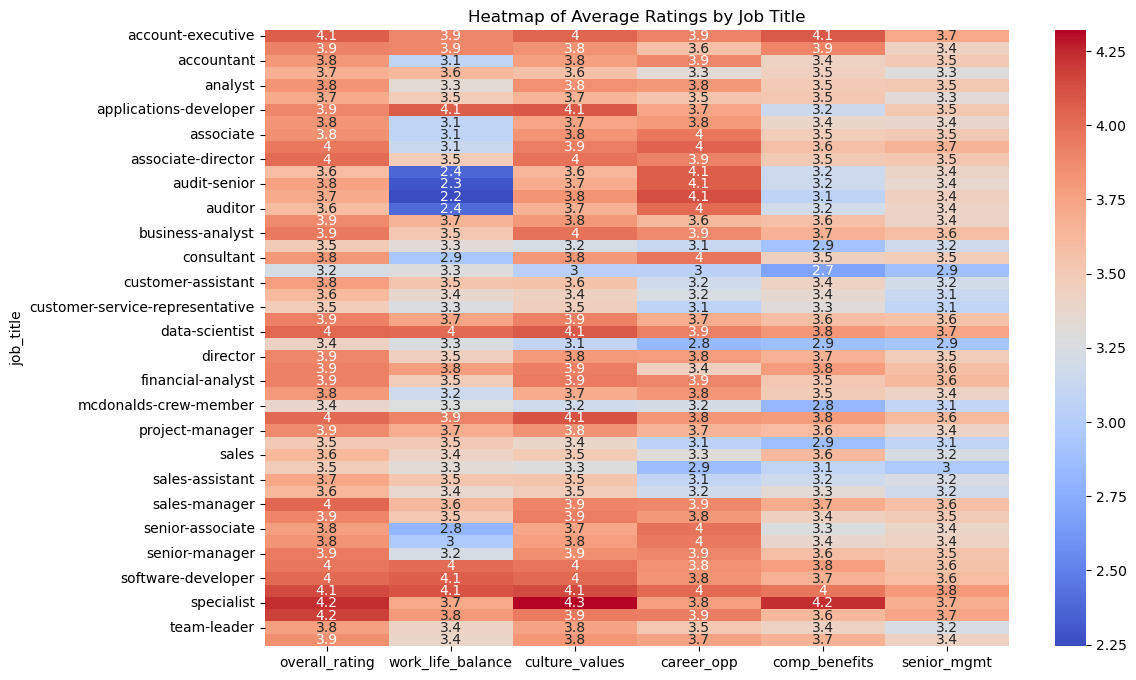

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 按公司分组计算平均评分和情感得分
company_group = df_top_companies.groupby('firm').mean()
job_group = df_top_jobs.groupby('job_title').mean()

# 热图可视化
plt.figure(figsize=(12, 8))
sns.heatmap(company_group[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']], annot=True, cmap='coolwarm')
plt.title('Heatmap of Average Ratings by Company')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(job_group[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']], annot=True, cmap='coolwarm')
plt.title('Heatmap of Average Ratings by Job Title')
plt.show()


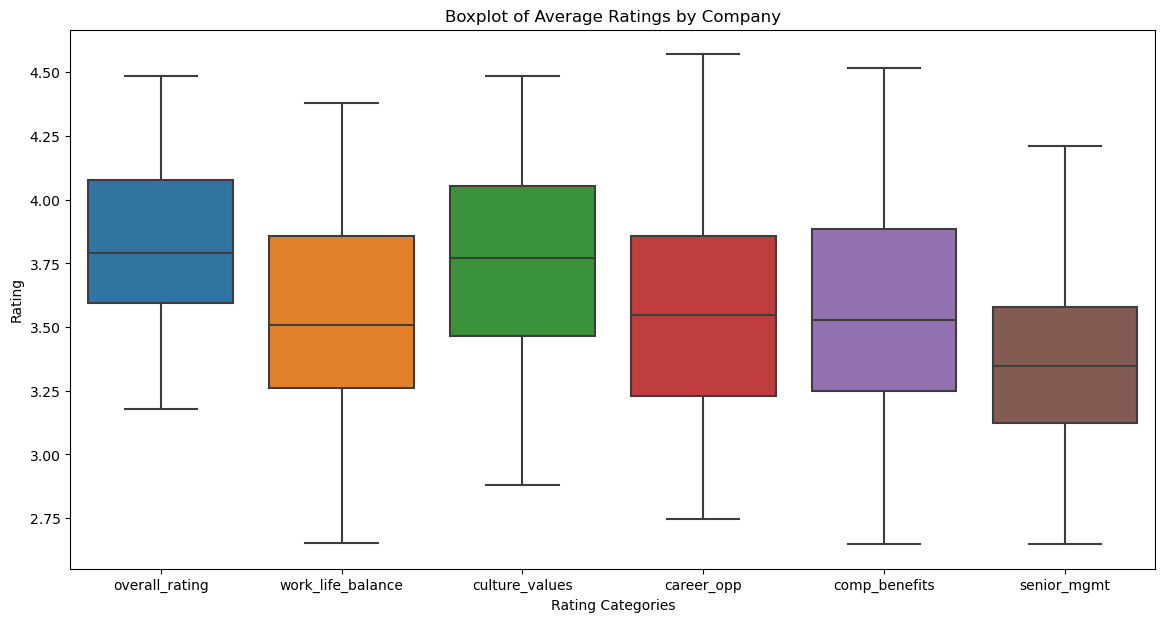

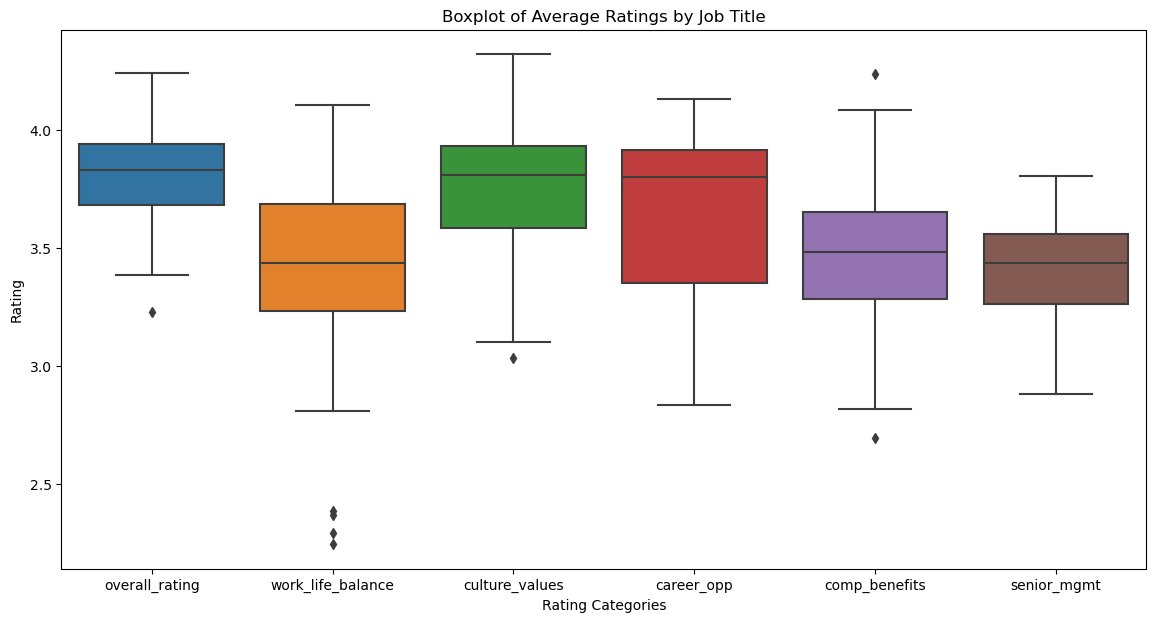

In [28]:
# 箱线图可视化
plt.figure(figsize=(14, 7))
sns.boxplot(data=company_group[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']])
plt.title('Boxplot of Average Ratings by Company')
plt.xlabel('Rating Categories')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=job_group[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']])
plt.title('Boxplot of Average Ratings by Job Title')
plt.xlabel('Rating Categories')
plt.ylabel('Rating')
plt.show()


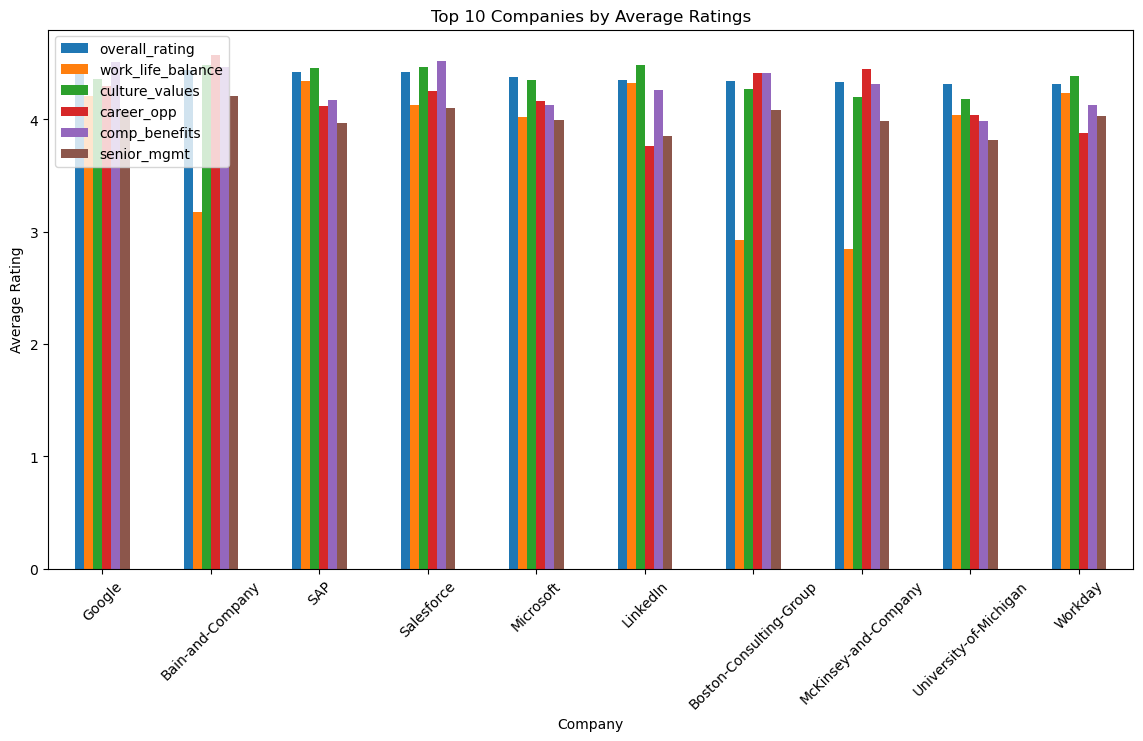

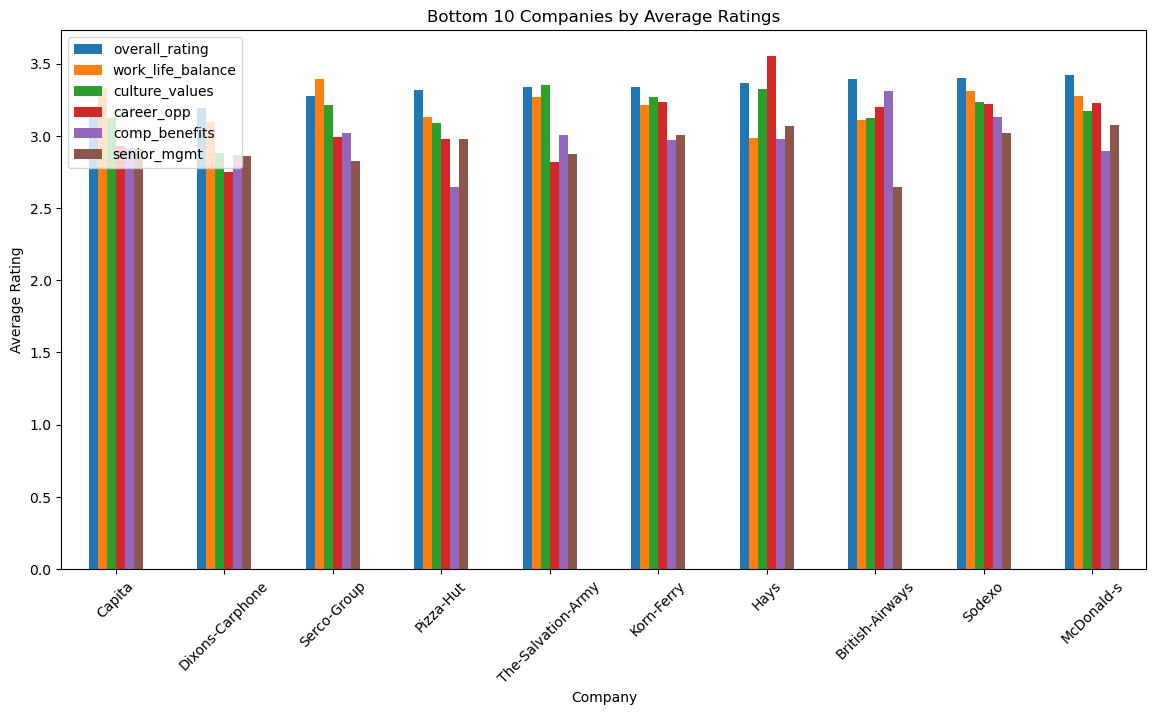

In [29]:
# 前10和后10公司评分
top_10_companies = company_group.nlargest(10, 'overall_rating')
bottom_10_companies = company_group.nsmallest(10, 'overall_rating')

# 条形图可视化
top_10_companies[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']].plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Companies by Average Ratings')
plt.xlabel('Company')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

bottom_10_companies[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']].plot(kind='bar', figsize=(14, 7))
plt.title('Bottom 10 Companies by Average Ratings')
plt.xlabel('Company')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()


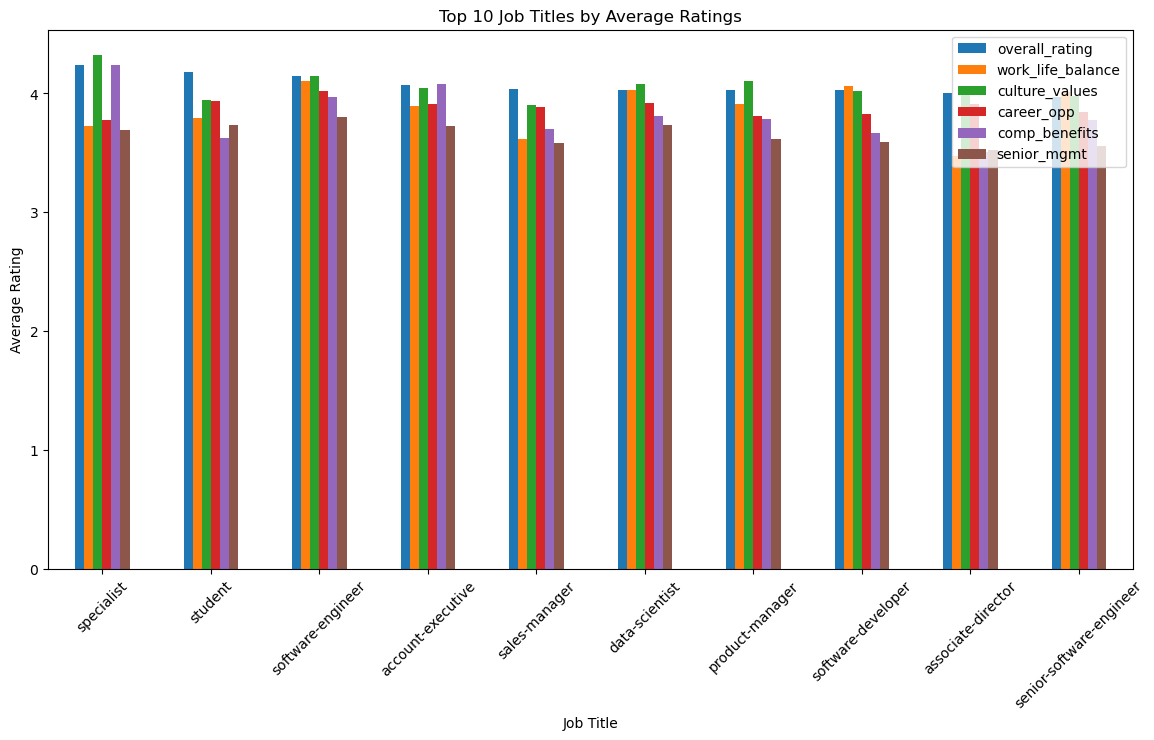

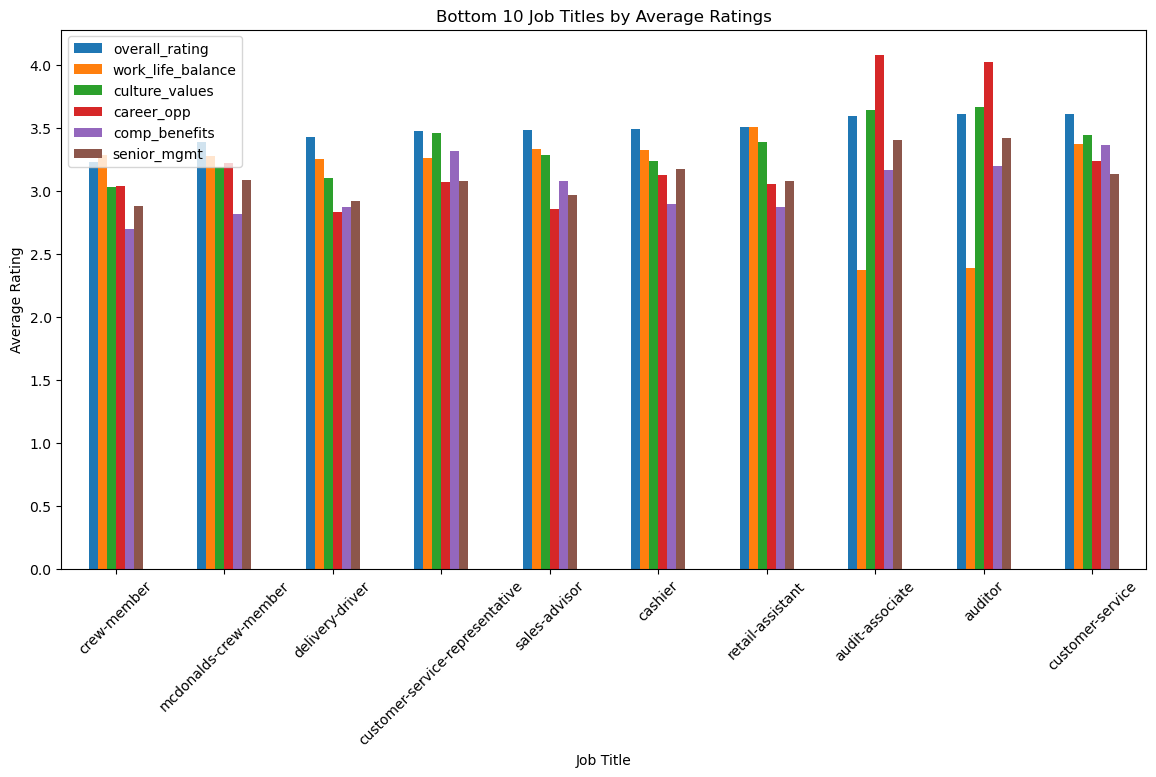

In [30]:
# 前10和后10职位评分
top_10_jobs = job_group.nlargest(10, 'overall_rating')
bottom_10_jobs = job_group.nsmallest(10, 'overall_rating')

# 条形图可视化
top_10_jobs[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']].plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Job Titles by Average Ratings')
plt.xlabel('Job Title')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

bottom_10_jobs[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']].plot(kind='bar', figsize=(14, 7))
plt.title('Bottom 10 Job Titles by Average Ratings')
plt.xlabel('Job Title')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()


In [31]:
!pip install wordcloud

In [32]:
# from wordcloud import WordCloud

# # 创建词云
# def generate_wordcloud(data, title):
#     text = ' '.join(data)
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# # 公司优缺点词云
# for company in top_10_companies.index:
#     company_data = df_top_companies[df_top_companies['firm'] == company]
#     generate_wordcloud(company_data['pros'], f"Top Pros for {company}")
#     generate_wordcloud(company_data['cons'], f"Top Cons for {company}")

# # 职位优缺点词云
# for job in top_10_jobs.index:
#     job_data = df_top_jobs[df_top_jobs['job_title'] == job]
#     generate_wordcloud(job_data['pros'], f"Top Pros for {job}")
#     generate_wordcloud(job_data['cons'], f"Top Cons for {job}")


In [33]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 计算情绪得分
# df['Sentiment_Pros'] = df['pros'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
# df['Sentiment_Cons'] = df['cons'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# # 选取情绪得分最高和最低的前10家公司
# top_10_sentiment_companies = df.groupby('firm')['Sentiment_Pros'].mean().nlargest(10).index
# bottom_10_sentiment_companies = df.groupby('firm')['Sentiment_Pros'].mean().nsmallest(10).index
# selected_companies = df[df['firm'].isin(top_10_sentiment_companies.union(bottom_10_sentiment_companies))]

# # 选取情绪得分最高和最低的前10个职位
# top_10_sentiment_jobs = df.groupby('job_title')['Sentiment_Pros'].mean().nlargest(10).index
# bottom_10_sentiment_jobs = df.groupby('job_title')['Sentiment_Pros'].mean().nsmallest(10).index
# selected_jobs = df[df['job_title'].isin(top_10_sentiment_jobs.union(bottom_10_sentiment_jobs))]

# # 可视化情绪得分与整体评分的关系（公司）
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Sentiment_Pros', y='overall_rating', hue='firm', data=selected_companies)
# plt.title('Sentiment Pros vs. Overall Rating (Selected Companies)')
# plt.xlabel('Sentiment Pros')
# plt.ylabel('Overall Rating')
# plt.legend(loc='best')
# plt.show()

# # 可视化情绪得分与整体评分的关系（职位）
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Sentiment_Pros', y='overall_rating', hue='job_title', data=selected_jobs)
# plt.title('Sentiment Pros vs. Overall Rating (Selected Job Titles)')
# plt.xlabel('Sentiment Pros')
# plt.ylabel('Overall Rating')
# plt.legend(loc='best')
# plt.show()




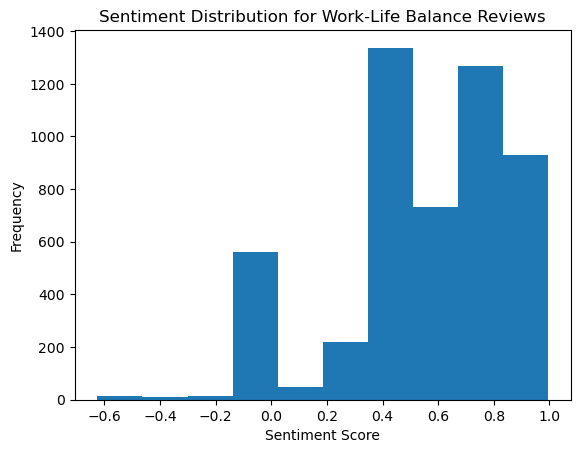

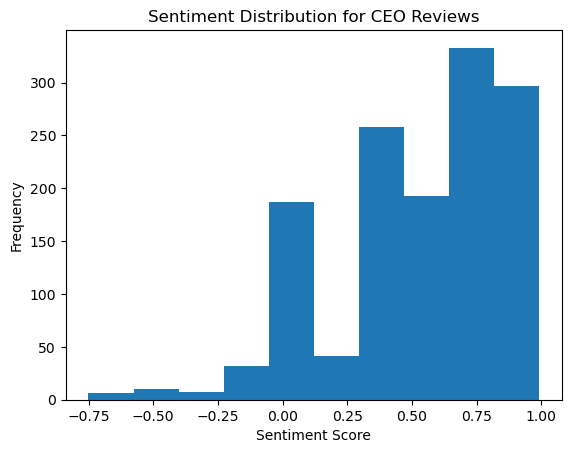

In [34]:
# 工作与生活平衡分析
work_life_balance_reviews = df_top_companies[df_top_companies['pros'].str.contains('work life', case=False)]
work_life_balance_reviews['Sentiment_Pros'].plot(kind='hist')
plt.title('Sentiment Distribution for Work-Life Balance Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 管理层评价分析
ceo_reviews = df_top_companies[df_top_companies['headline'].str.contains('management', case=False)]
ceo_reviews['Sentiment_Pros'].plot(kind='hist')
plt.title('Sentiment Distribution for CEO Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [35]:
# analyzer = SentimentIntensityAnalyzer()
# df['Sentiment_Pros'] = df['pros'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
# df['Sentiment_Cons'] = df['cons'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
# df['Sentiment_Overall'] = df['headline'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# # 定义情绪分类函数
# def classify_sentiment(score):
#     if score >= 0.05:
#         return 'Positive'
#     elif score <= -0.05:
#         return 'Negative'
#     else:
#         return 'Neutral'

# 应用情绪分类函数
# df['Pros_Sentiment_Category'] = df['Sentiment_Pros'].apply(classify_sentiment)
# df['Cons_Sentiment_Category'] = df['Sentiment_Cons'].apply(classify_sentiment)
# df['Overall_Sentiment_Category'] = df['Sentiment_Overall'].apply(classify_sentiment)

# 统计情绪分布
pros_sentiment_distribution = df_top_companies['Pros_Sentiment_Category'].value_counts()
cons_sentiment_distribution = df_top_companies['Cons_Sentiment_Category'].value_counts()
overall_sentiment_distribution = df_top_companies['Overall_Sentiment_Category'].value_counts()

print("Pros Sentiment Distribution:\n", pros_sentiment_distribution)
print("Cons Sentiment Distribution:\n", cons_sentiment_distribution)
print("Overall Sentiment Distribution:\n", overall_sentiment_distribution)


Pros Sentiment Distribution:
 Positive    79344
Neutral      9072
Negative     1952
Name: Pros_Sentiment_Category, dtype: int64
Cons Sentiment Distribution:
 Neutral     31200
Negative    29880
Positive    29288
Name: Cons_Sentiment_Category, dtype: int64
Overall Sentiment Distribution:
 Positive    56655
Neutral     27610
Negative     6103
Name: Overall_Sentiment_Category, dtype: int64


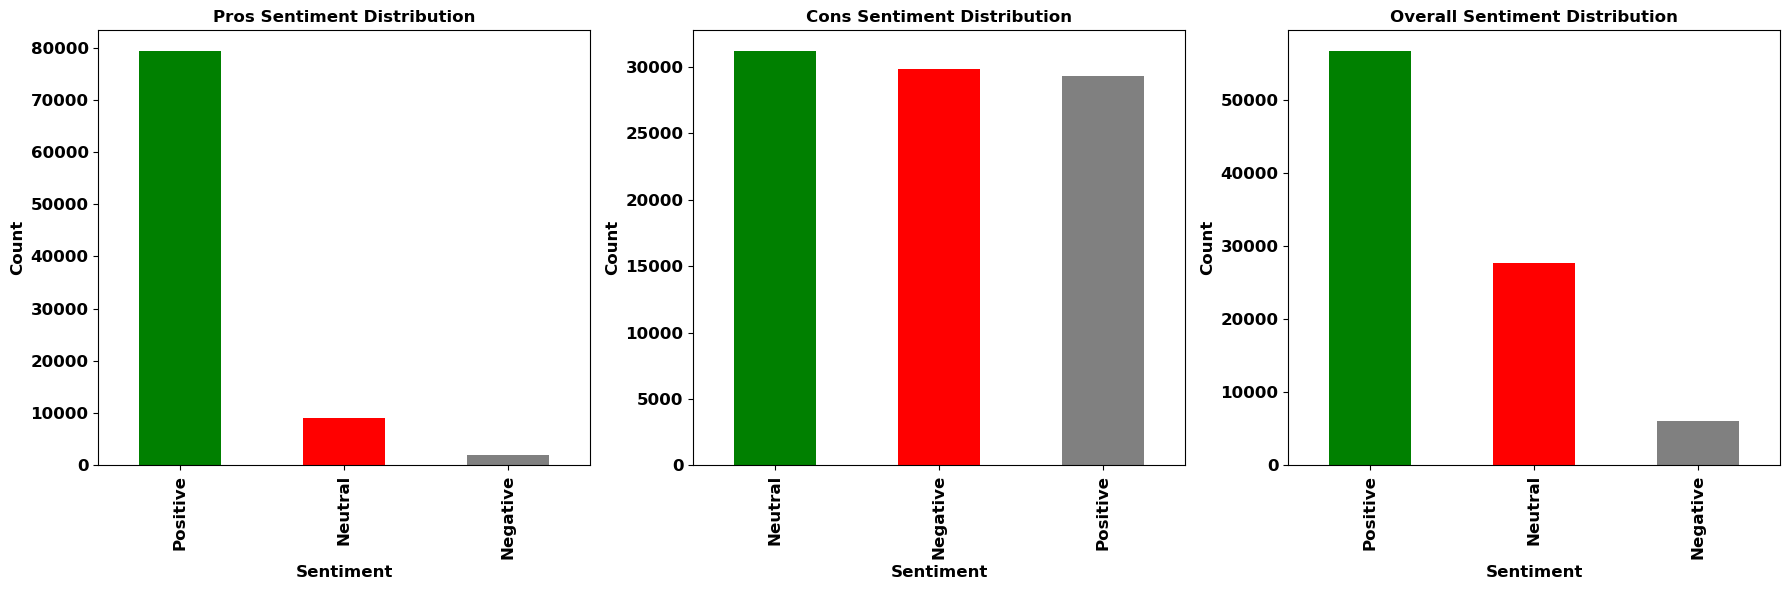

In [36]:
import matplotlib.pyplot as plt

# 设置字体属性
font = {'size': 12, 'weight': 'bold'}

# 条形图可视化
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
pros_sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Pros Sentiment Distribution', fontdict=font)
plt.xlabel('Sentiment', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.subplot(1, 3, 2)
cons_sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Cons Sentiment Distribution', fontdict=font)
plt.xlabel('Sentiment', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.subplot(1, 3, 3)
overall_sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Overall Sentiment Distribution', fontdict=font)
plt.xlabel('Sentiment', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


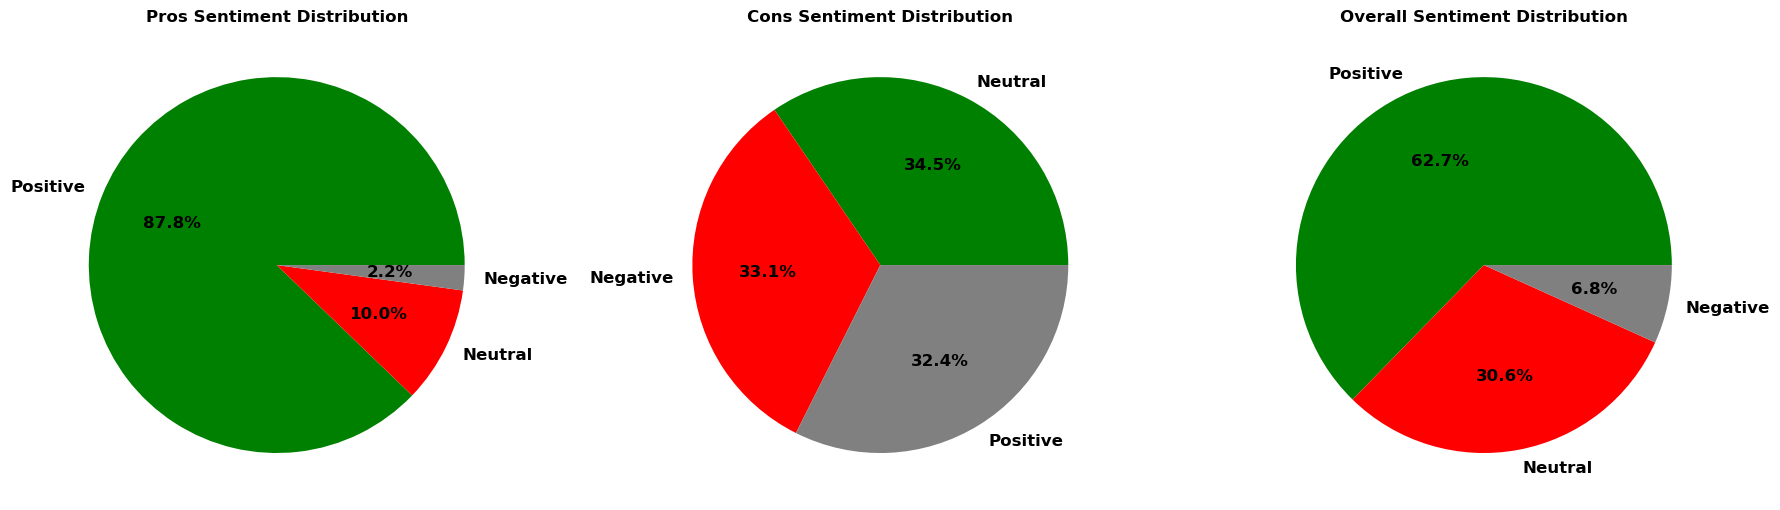

In [37]:
# 饼图可视化
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
pros_sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'], textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Pros Sentiment Distribution', fontdict=font)
plt.ylabel('')

plt.subplot(1, 3, 2)
cons_sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'], textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Cons Sentiment Distribution', fontdict=font)
plt.ylabel('')

plt.subplot(1, 3, 3)
overall_sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'], textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Overall Sentiment Distribution', fontdict=font)
plt.ylabel('')

plt.tight_layout()
plt.show()


In [38]:
from scipy.stats import pearsonr
# 计算相关性
pros_corr, pros_p_value = pearsonr(df_top_companies['Sentiment_Pros'], df_top_companies['overall_rating'])
cons_corr, cons_p_value = pearsonr(df_top_companies['Sentiment_Cons'], df_top_companies['overall_rating'])
overall_corr, overall_p_value = pearsonr(df_top_companies['Sentiment_Headline'], df_top_companies['overall_rating'])

print(f"Pros Sentiment vs. Overall Rating: Correlation={pros_corr}, P-value={pros_p_value}")
print(f"Cons Sentiment vs. Overall Rating: Correlation={cons_corr}, P-value={cons_p_value}")
print(f"Overall Sentiment vs. Overall Rating: Correlation={overall_corr}, P-value={overall_p_value}")

Pros Sentiment vs. Overall Rating: Correlation=0.24600071272969293, P-value=0.0
Cons Sentiment vs. Overall Rating: Correlation=0.10048564107386429, P-value=1.889809867731586e-201
Overall Sentiment vs. Overall Rating: Correlation=0.44523754489318845, P-value=0.0


In [39]:
import statsmodels.api as sm

# 准备回归分析数据
X = df_top_companies[['Sentiment_Pros', 'Sentiment_Cons', 'Sentiment_Headline']]
y = df_top_companies['overall_rating']

# 添加常数项
X = sm.add_constant(X)

# 进行回归分析
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     8744.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:47:12   Log-Likelihood:            -1.2737e+05
No. Observations:               90368   AIC:                         2.547e+05
Df Residuals:                   90364   BIC:                         2.548e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0794      0

In [40]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 可视化情绪得分与整体评分的散点图和回归线
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 3, 1)
# sns.regplot(x='Sentiment_Pros', y='overall_rating', data=df)
# plt.title('Pros Sentiment vs. Overall Rating')
# plt.xlabel('Sentiment Pros')
# plt.ylabel('Overall Rating')

# plt.subplot(1, 3, 2)
# sns.regplot(x='Sentiment_Cons', y='overall_rating', data=df)
# plt.title('Cons Sentiment vs. Overall Rating')
# plt.xlabel('Sentiment Cons')
# plt.ylabel('Overall Rating')

# plt.subplot(1, 3, 3)
# sns.regplot(x='Sentiment_Overall', y='overall_rating', data=df)
# plt.title('Overall Sentiment vs. Overall Rating')
# plt.xlabel('Sentiment Overall')
# plt.ylabel('Overall Rating')

# plt.tight_layout()
# plt.show()


In [41]:
df_top_jobs.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'job_level', 'job_category', 'Cleaned_Headline', 'Cleaned_Pros',
       'Cleaned_Cons', 'Processed_Headline', 'Processed_Pros',
       'Processed_Cons', 'Sentiment_Headline', 'Sentiment_Pros',
       'Sentiment_Cons', 'Pros_Sentiment_Category', 'Cons_Sentiment_Category',
       'Overall_Sentiment_Category'],
      dtype='object')

In [42]:
df_top_companies.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'firm_industry', 'Cleaned_Headline', 'Cleaned_Pros', 'Cleaned_Cons',
       'Processed_Headline', 'Processed_Pros', 'Processed_Cons',
       'Sentiment_Headline', 'Sentiment_Pros', 'Sentiment_Cons',
       'Pros_Sentiment_Category', 'Cons_Sentiment_Category',
       'Overall_Sentiment_Category'],
      dtype='object')

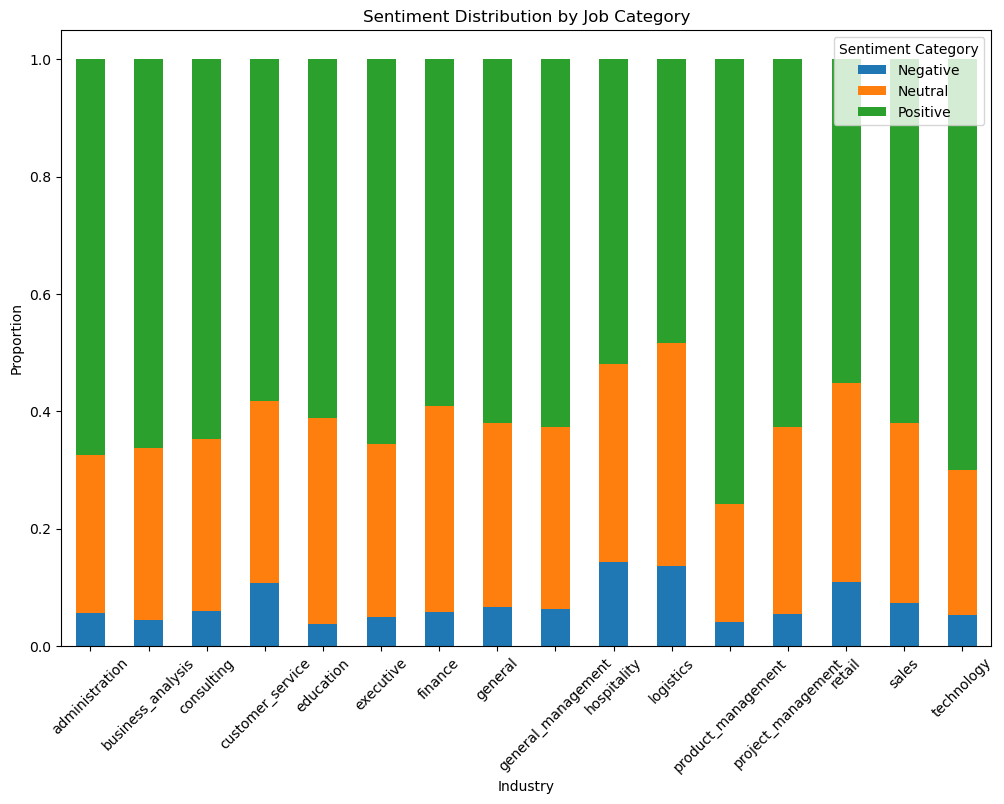

In [43]:
industry_sentiment_distribution = df_top_jobs.groupby('job_category')['Overall_Sentiment_Category'].value_counts(normalize=True).unstack()

# 可视化情绪分布
industry_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Job Category')
plt.xlabel('Industry')
plt.ylabel('Proportion')
plt.legend(title='Sentiment Category')
plt.xticks(rotation = 45)
plt.show()

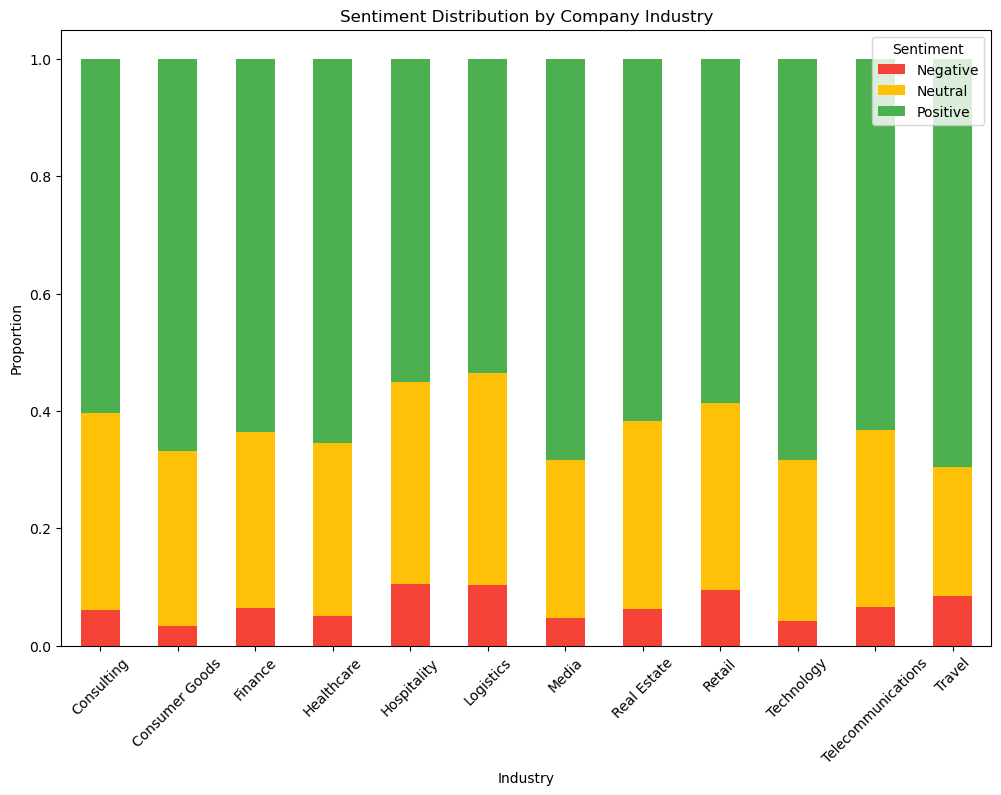

In [44]:
# 分组统计情绪分布
industry_sentiment = df_top_companies.groupby('firm_industry')['Overall_Sentiment_Category'].value_counts(normalize=True).unstack()

# 可视化
industry_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#F44336', '#FFC107', '#4CAF50'])
plt.title('Sentiment Distribution by Company Industry')
plt.xlabel('Industry')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation = 45)
plt.show()


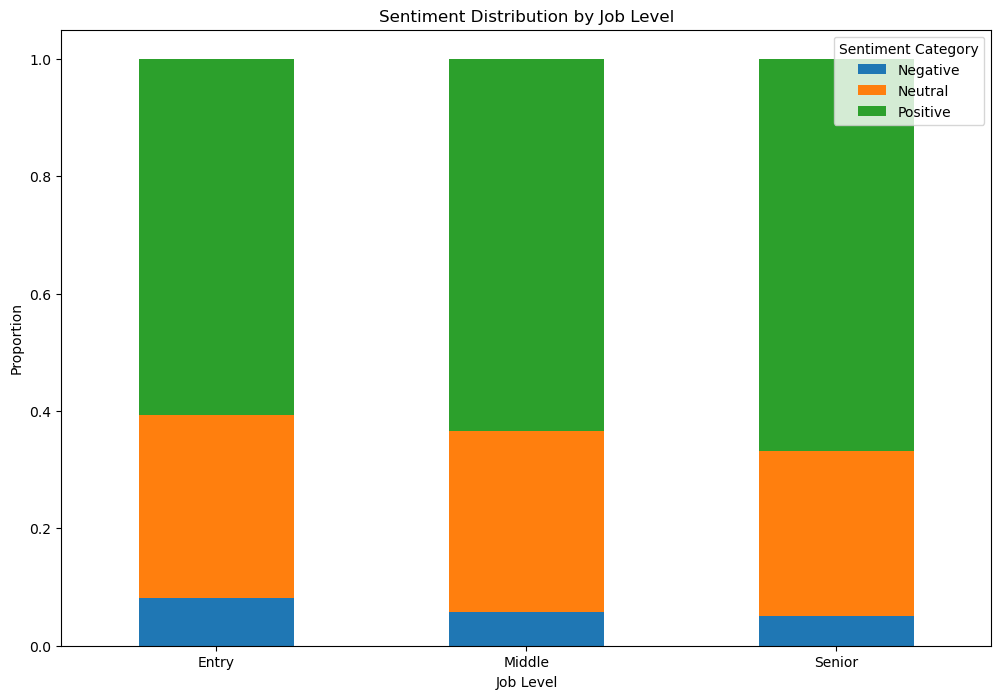

In [45]:
# 按工作等级统计情绪分布
joblevel_sentiment_distribution = df_top_jobs.groupby('job_level')['Overall_Sentiment_Category'].value_counts(normalize=True).unstack()

# 可视化情绪分布
joblevel_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Proportion')
plt.legend(title='Sentiment Category')
plt.xticks(rotation = 360)
plt.show()


/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_34470/223170053.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating Category', y='Rating', hue='firm_industry', data=df_melted, ci=None)


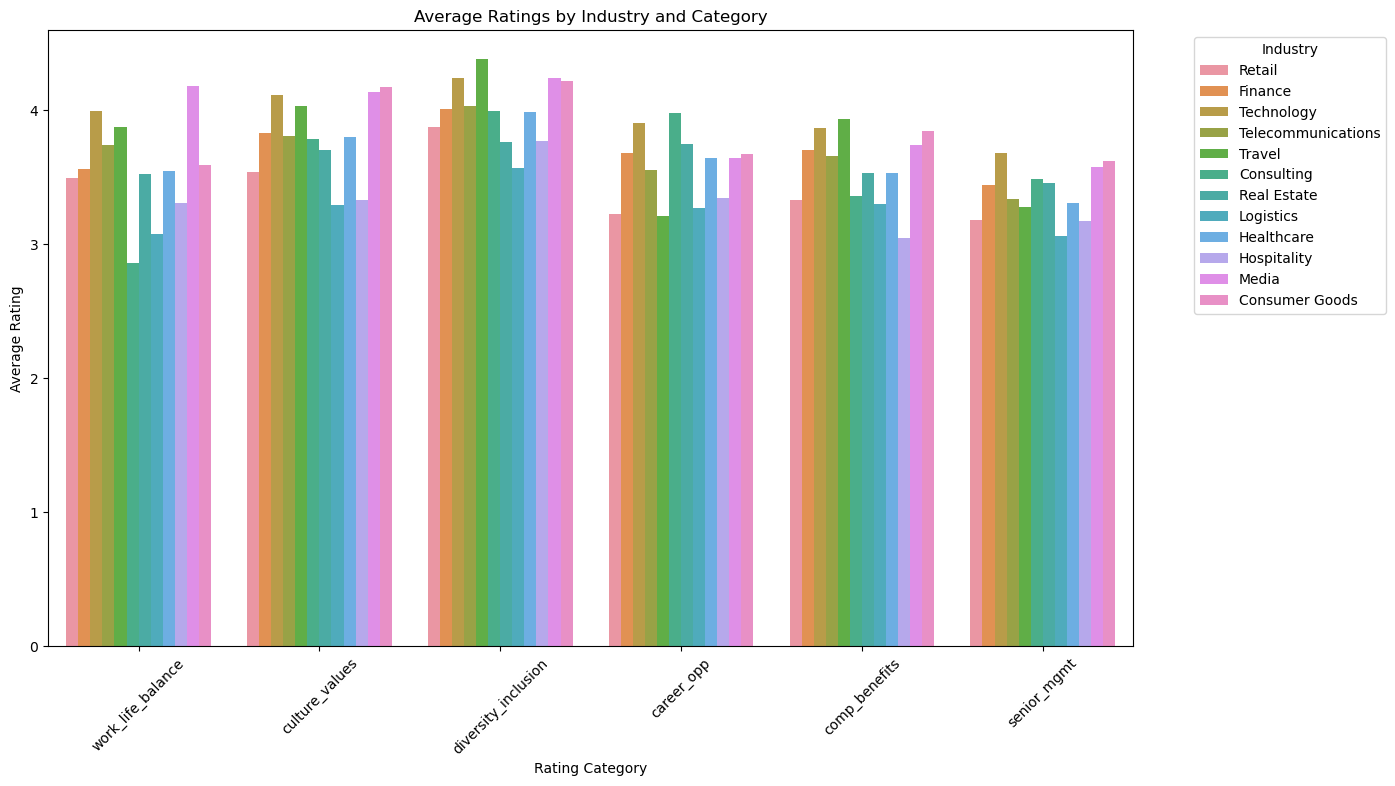

In [46]:
# 按行业统计员工满意度
df_melted = pd.melt(df_top_companies, id_vars=['firm_industry'], 
                    value_vars=['work_life_balance', 'culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt'],
                    var_name='Rating Category', value_name='Rating')

# 创建分组柱状图
plt.figure(figsize=(14, 8))
sns.barplot(x='Rating Category', y='Rating', hue='firm_industry', data=df_melted, ci=None)
plt.title('Average Ratings by Industry and Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Rating')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


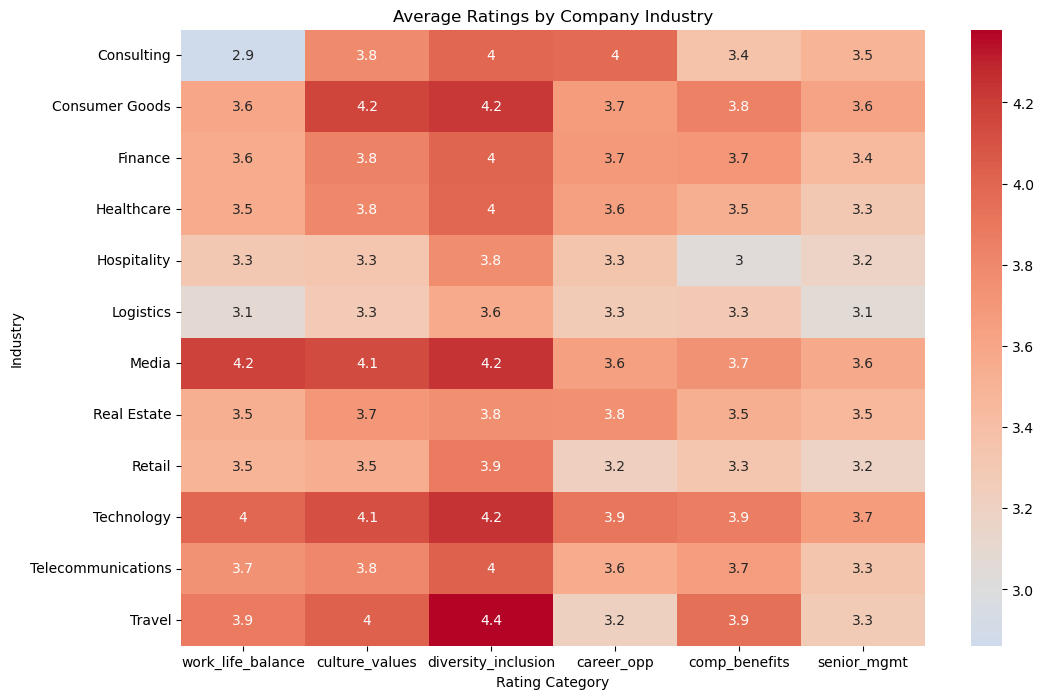

In [47]:
# 计算各行业在各评分维度上的平均分数
industry_means = df_top_companies.groupby('firm_industry')[['work_life_balance', 'culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt']].mean()

# 创建热图
plt.figure(figsize=(12, 8))
sns.heatmap(industry_means, annot=True, cmap='coolwarm', center=3)
plt.title('Average Ratings by Company Industry')
plt.xlabel('Rating Category')
plt.ylabel('Industry')
plt.show()


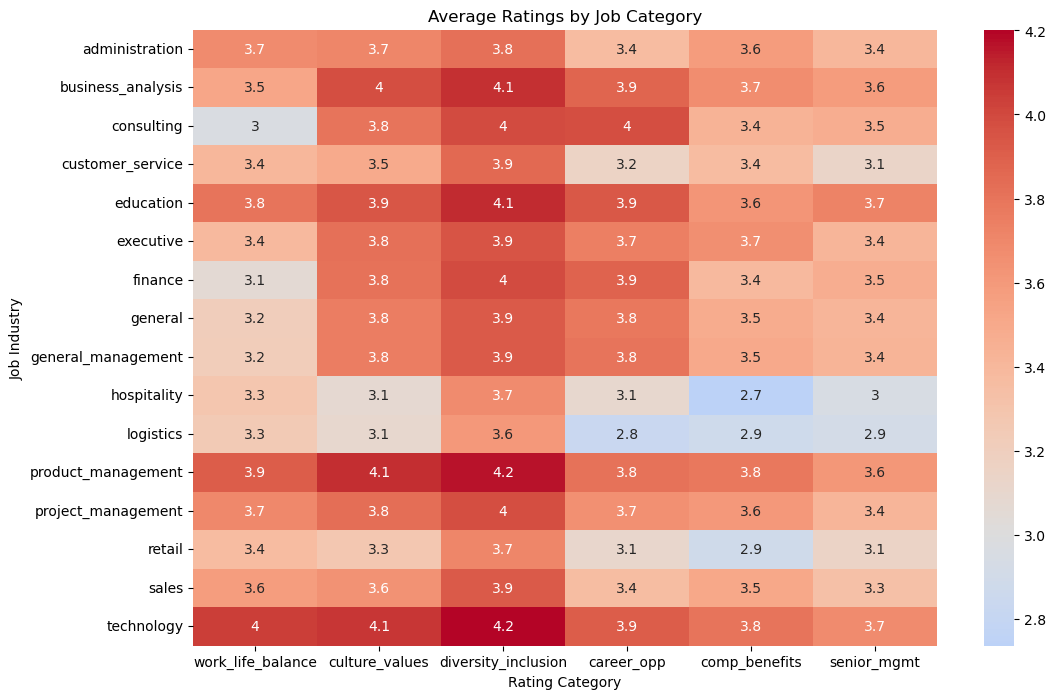

In [48]:
# 计算各行业在各评分维度上的平均分数
industry_means = df_top_jobs.groupby('job_category')[['work_life_balance', 'culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt']].mean()

# 创建热图
plt.figure(figsize=(12, 8))
sns.heatmap(industry_means, annot=True, cmap='coolwarm', center=3)
plt.title('Average Ratings by Job Category')
plt.xlabel('Rating Category')
plt.ylabel('Job Industry')
plt.show()

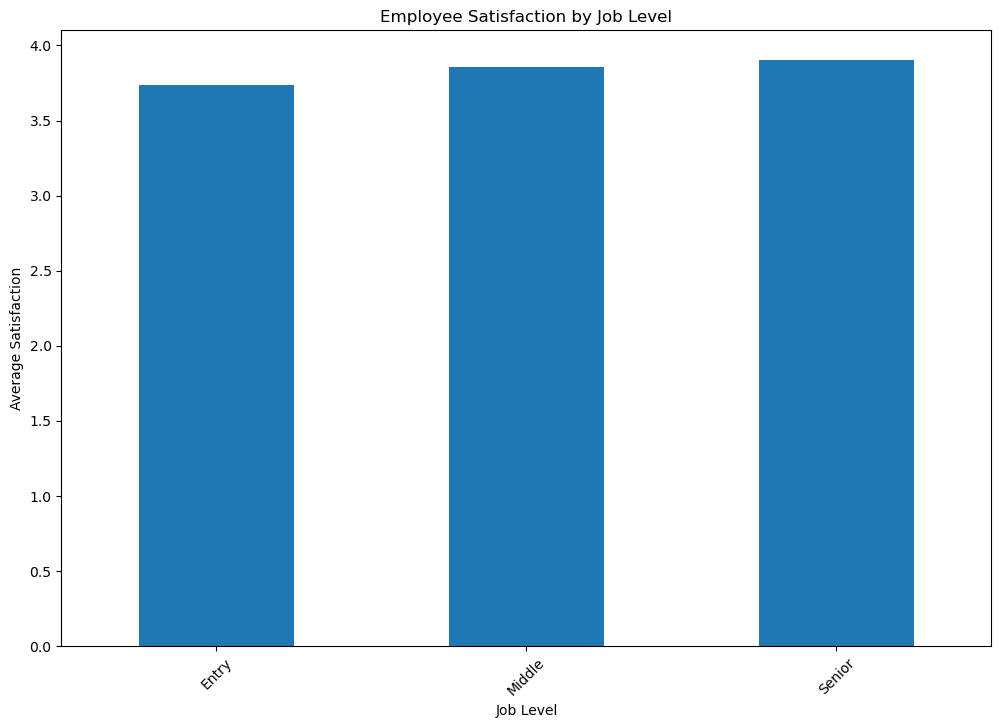

In [49]:
# 按工作等级统计员工满意度
joblevel_satisfaction = df_top_jobs.groupby('job_level')['overall_rating'].mean()

# 可视化员工满意度
joblevel_satisfaction.plot(kind='bar', figsize=(12, 8))
plt.title('Employee Satisfaction by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Average Satisfaction')
plt.xticks(rotation = 45)
plt.show()


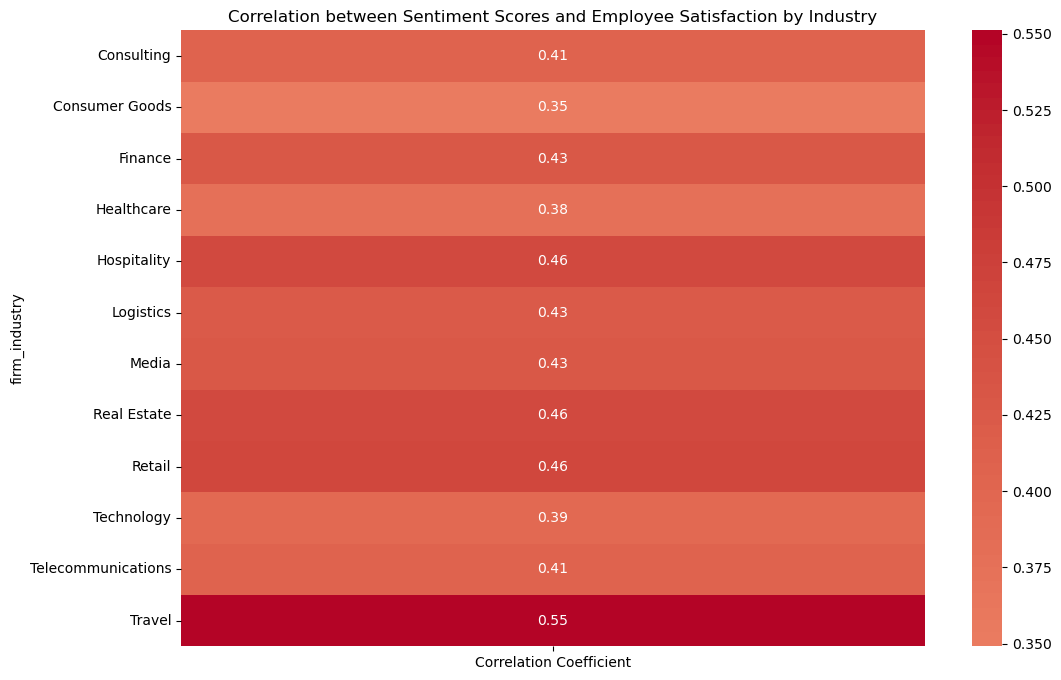

In [50]:
import scipy.stats as stats

# 计算相关系数
correlation_results = df_top_companies.groupby('firm_industry').apply(lambda group: stats.pearsonr(group['Sentiment_Headline'], group['overall_rating']))

# 将结果转换为DataFrame
correlation_df = pd.DataFrame(correlation_results.tolist(), index=correlation_results.index, columns=['Correlation Coefficient', 'P-value'])

# 可视化
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df[['Correlation Coefficient']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Sentiment Scores and Employee Satisfaction by Industry')
plt.show()


In [51]:
# 